In [20]:
import os
import sys
curDir = os.path.abspath("")
sys.path.append(os.path.join(curDir, "..", "PreProcessing"))
sys.path.append(os.path.join(curDir, "..", "General"))

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import DataSetBuilder as dataBuilder
from DataLoader import DataLoader

In [2]:
years = [2013]
dfOrig = dataBuilder.build_data_set(years=years)


20210520--09:47:45--INFO--Reading adjusted data files


In [22]:
dl = DataLoader()
mu15 = dl.get_fifteen_years_mortgage_rate()

In [3]:
columnList = dfOrig.columns.to_list()

In [4]:
class ColumnNames():
    Partial = "prepayment_type_PartialPrepayment"
    Full = "prepayment_type_FullPrepayment"
    PpmFlag = "prepayment_flag_True"
    Upb = "orig_upb"
    Ltv = "ltv"


columns = [
    "id_loan", 
    "ltv",
    "loan_purpose_C",
    ColumnNames.Upb,
    ColumnNames.Full,
    ColumnNames.Partial,
    ColumnNames.PpmFlag,
]
dfTakeALook = dfOrig[columns]

In [15]:
ys = range(2013, 2021)
yearDict = {}
for y in ys:
    dfOrig = dataBuilder.build_data_set(years=[y])
    dfTakeALook = dfOrig[columns]
    yearDict[y] = dfTakeALook[ColumnNames.Full].values.sum() / len(dfTakeALook.index)

20210520--09:52:39--INFO--Reading adjusted data files
20210520--09:52:39--INFO--Reading adjusted data files
20210520--09:52:40--INFO--Reading adjusted data files
20210520--09:52:41--INFO--Reading adjusted data files
20210520--09:52:41--INFO--Reading adjusted data files
20210520--09:52:42--INFO--Reading adjusted data files
20210520--09:52:42--INFO--Reading adjusted data files
20210520--09:52:43--INFO--Reading adjusted data files


Text(0.5, 1.0, 'plot full prepayment percentage over time')

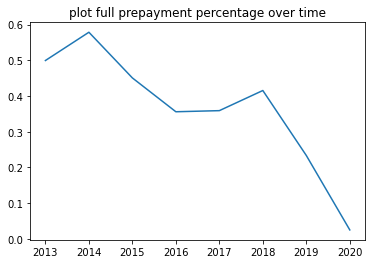

In [19]:
fig, ax = plt.subplots()
ax.plot(list(yearDict.keys()), list(yearDict.values()))
ax.set_title("plot full prepayment percentage over time")

In [17]:
yearDict

{2013: 0.49950837764623257,
 2014: 0.5786716444872644,
 2015: 0.4507429167251509,
 2016: 0.3560086611331649,
 2017: 0.35911790673408783,
 2018: 0.41550129411528663,
 2019: 0.23357076743530927,
 2020: 0.025098702763677382}

In [24]:
mu15.reset_index(inplace=True)

In [28]:
interest = mu15.groupby(mu15.observation_date.dt.year).max()["MORTGAGE15US"].values

Text(0.5, 1.0, 'plot full prepayment percentage over time')

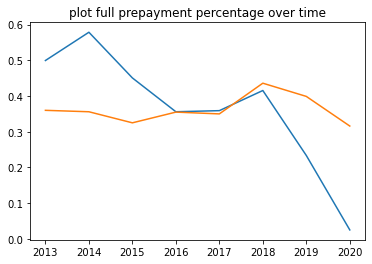

In [30]:
fig, ax = plt.subplots()
ax.plot(list(yearDict.keys()), list(yearDict.values()))
ax.plot(list(yearDict.keys()), interest /10)
ax.set_title("plot full prepayment percentage over time")